# Perceptron simple




In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import random
from mpl_toolkits.mplot3d import axes3d
from google.colab import files
pd.set_option('display.max_columns', 500)

# Definición de la clase perceptron 



In [ ]:
class Perceptron:
    def __init__(self, eta=0.1, n_iter=100):      #O(1)
        self.eta = float(eta)     #O(1)
        self.n_iter = n_iter      #O(1)

    def train(self, X, y):      #O(n^2)
        # inicializar los pesos en 0
        self.w = np.zeros(len(X[1])+1)    #O(1)

        #vector de errores acumulados
        self.errors = []                  #O(1)

        #ciclo de entrenamiento
        for i in range(self.n_iter):      #O(n^2)
            errors = 0
            for x_i, target in zip(X,y):     #O(n)
                #calcular el nuevo valor de los pesos
                delta_w = np.array((target - self.predict(x_i)) * self.eta)
                #actualizar el valor de los pesos
                self.w[1:] += delta_w * x_i
                #actualizar el valor del bias
                self.w[0] += delta_w
                if (delta_w!=0):
                    errors += 1 
            self.errors.append(errors)      #O(1)
 

    def predict(self, X):     #O(1)
        #combinacion lineal, w[0] = bias
        v = np.dot( X, self.w [1:]) + self.w[0]     #O(1)
        #funcion de activación 
        if v > 0.0:             #O(1)
            return 1              #O(1)
        return -1               #O(1)

In [ ]:
#cargar los archivos de los dataset
files.upload();

Saving Skin_NonSkin.txt to Skin_NonSkin.txt


# Leer el dataset skin segmentation

The skin dataset is collected by randomly sampling B,G,R values from face images of various age groups (young, middle, and old), race groups (white, black, and asian), and genders obtained from FERET database and PAL database. Total learning sample size is 245057; out of which 50859 is the skin samples and 194198 is non-skin samples.

>50859 -> skin 80% = 40687 \
194198 -> non-skin 80% = 155358

El dataset esta disponible en https://archive.ics.uci.edu/ml/datasets/Skin+Segmentation


In [ ]:
import math
#Leer los datos del archivo
df = pd.read_csv('Skin_NonSkin.txt', sep="\t", header=None)           #O(1)
#tomar de las primeras 100 filas, y las 4 columnas B,G,R y si es skin o no
skin_df = df[0:245057][[0,1,2,3]]                 #O(1)
#tomar la columna skin como 1 para skin y 2 para no-skin  
y_skin = df[0:245057][[3]]                        #O(1)
y_skin = np.where(y_skin == 'Skin', 1, 2)         #O(1)

#print("Primeros valores del dataset")
#print(df.head(100))
#print(skin_df)

skin_aux = []                           #O(1)
for i in range(len(skin_df)):             #O(n)
  aux = str(skin_df[0][i])+str(skin_df[1][i])+str(skin_df[2][i])  #O(1)
  skin_aux.append(float(aux)/255255255)                           #O(1)
print(skin_aux[0])                      #O(1)

0.029324070135206423


In [ ]:
print(skin_aux[1])      #O(1)

0.0289283838642225


In [ ]:
print(skin_df)          #O(1)

          0    1    2  3
0        74   85  123  1
1        73   84  122  1
2        72   83  121  1
3        70   81  119  1
4        70   81  119  1
...     ...  ...  ... ..
245052  163  162  112  2
245053  163  162  112  2
245054  163  162  112  2
245055  163  162  112  2
245056  255  255  255  2

[245057 rows x 4 columns]


In [ ]:
print(skin_df[-5000:][[1]])     #O(1)
range(5000)                     #O(1)

          1
240057   68
240058   69
240059   69
240060   69
240061   69
...     ...
245052  162
245053  162
245054  162
245055  162
245056  255

[5000 rows x 1 columns]


range(0, 5000)

In [ ]:
print(len(skin_aux))        #O(1)

245057


In [ ]:
print(skin_aux[:100])       #O(1)

[0.029324070135206423, 0.0289283838642225, 0.02853269759323858, 0.02774132505127074, 0.02774132505127074, 0.027345638780286816, 0.02774132505127074, 0.02774132505127074, 0.030115442677174267, 0.030115442677174267, 0.03051112894815819, 0.03051112894815819, 0.03051112894815819, 0.030906815219142108, 0.0304993720893229, 0.030895058360306822, 0.030895058360306822, 0.0304993720893229, 0.03010368581833898, 0.0304993720893229, 0.031686430902274666, 0.03287348971522643, 0.03287348971522643, 0.033269175986210354, 0.033269175986210354, 0.03287348971522643, 0.031686430902274666, 0.030895058360306822, 0.030895058360306822, 0.031290744631290744, 0.030895058360306822, 0.031290744631290744, 0.03208211717325859, 0.03247780344424251, 0.03287348971522643, 0.03247780344424251, 0.03208211717325859, 0.03208211717325859, 0.033269175986210354, 0.03208211717325859, 0.031290744631290744, 0.031290744631290744, 0.03247780344424251, 0.03287348971522643, 0.03247780344424251, 0.03090290148972643, 0.0312985877607103

# Selección de datos

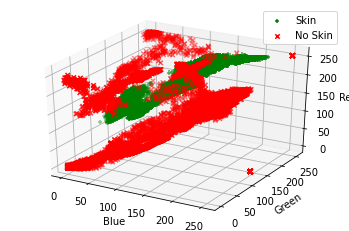

In [ ]:
fig = plt.figure()        #O(1)
ax1 = fig.add_subplot(111, projection='3d')       #O(1)

numDatos=25000            #O(1)

ax1.scatter(skin_df[:numDatos][[0]], skin_df[:numDatos][[1]], skin_df[:numDatos][[2]], color='green', marker='+', label='Skin')       #O(1)
ax1.scatter(skin_df[-numDatos:][[0]], skin_df[-numDatos:][[1]], skin_df[-numDatos:][[2]], color='red', marker='x', label='No Skin')   #O(1)

ax1.set_xlabel('Blue')            #O(1)
ax1.set_ylabel('Green')           #O(1)
ax1.set_zlabel('Red')             #O(1)
ax1.legend(loc='upper right')     #O(1)

plt.show()                        #O(1)

Como se puede ver en la gráfica los datos son diferenciables entonces se pueden usar estos datos.

# Entrenamiento del perceptron

Se toma un sudDataSet para el entrenamiento y prueba del perceptrón.

Se toma el 80% del sudDataSet para entrenar el perceptron.



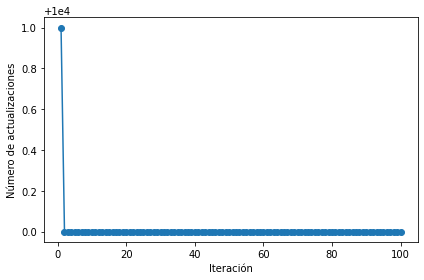

In [ ]:
#tomar el 80 % del  dataset para el entrenamiento

# X_training = np.concatenate((skin_df[0:40687][[0,1,2]],skin_df[50860:206218][[0,1,2]]),axis=0)
# y_training = np.concatenate((skin_df[0:40687][[3]],skin_df[50860:206218][[3]]),axis=0)

X_training = np.concatenate((skin_df[0:10000][[0,1,2]],skin_df[50860:50860+10000][[0,1,2]]),axis=0)   #O(1)
y_training = np.concatenate((skin_df[0:10000][[3]],skin_df[50860:50860+10000][[3]]),axis=0)           #O(1)

#entrenar el perceptron
perceptron = Perceptron(2)                  #O(1)
perceptron.train(X_training, y_training)    #O(n^2)

plt.plot(range(1, len(perceptron.errors) + 1), perceptron.errors, marker='o')   #O(1)
plt.xlabel('Iteración')     #O(1)
plt.ylabel('Número de actualizaciones')     #O(1)

plt.tight_layout()          #O(1)
plt.show()                  #O(1)

# Prueba del perceptron
Se toma el 20% restante del subDataset para probar el perceptron:

In [ ]:
#Tomar el 20% restante del dataset para probar el perceptron
X_test = np.concatenate((skin_df[0+10000:10000+2000][[0,1,2]],skin_df[50860+10000:50860+10000+2000][[0,1,2]]),axis=0)     #O(1)
y_test = np.concatenate((skin_df[0+10000:10000+2000][[3]],skin_df[50860+10000:50860+10000+2000][[3]]),axis=0)             #O(1)

#calcular los errores en la clasificacion 
error = 0           #O(1)
for i in range(0,len(X_test)):          #O(n)
    if perceptron.predict(X_test[i]) != y_test[i]:      #O(1)
        error += 1                                      #O(1)
error = error / len(X_test) * 100       #O(1)
print("error = {}%".format(error))      #O(1)

error = 50.0%


# **Análisis del perceptrón**



El perceptron simple presentó un 50% de exactitud una de las primeras razones que se podria intuir frente a esta cifra es que esto es debido a la poca capacidad de del perceptron para analizar toda muestra que este posee (de 245057 filas de datos presentes en el dataset el perceptron solo utilizó 10000 datos, lo que implica que la muestra tan solo fue correspondiente a un 4% aproximado de todo el dataset). Esto sin embargo no es realmente la verdadera causa pues la idea de un modelo neuronal es lograr clasificar sin haber visto todas las posibilidades.

La causa más probable de que la efectividad solo pudiese llegar a esta cifra del 50% se encuentra en el simple hecho de que se está intentanto realizar un clasificador para datos que pueden ser del orden 10^9 de magnitud con un solo perceptron y esto a su vez a la simplicidad de este, el cual está diseñado para hacer analisis de datos a nivel bidimencional, cosa constituyó un limité puesto que los datos a manejar en el dataset utilizado constaban de 4 columnas de datos, las primeras tres siendo un valor para la codificación RGB y la ultima siendo el indicador binario para saber si dicha codificacion RGB se trataba de un "color piel" o no.





# Referencias

https://www.llipe.com/2017/04/19/programando-un-clasificador-perceptron-en-python/

https://machinelearningmastery.com/standard-machine-learning-datasets/

Dataset tomado de: https://archive.ics.uci.edu/ml/datasets/Skin+Segmentation

